In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import afterthought.backtestor as bt
from afterthought.trigger import Timer

In [6]:
price = pd.read_csv('data/test_price.csv', index_col='date')
price.index = pd.to_datetime(price.index)

In [7]:
price

,DXCM,PODD,HLF,RMD,DVA
date,,,,,
2013-11-18,31.49,35.02,33.449327,46.293022,59.27
2013-11-19,32.16,34.70,32.837085,46.439028,58.30
2013-11-20,32.22,34.81,34.962511,46.767541,57.84
2013-11-21,32.77,35.31,34.056592,46.366025,56.89
2013-11-22,32.41,35.59,35.664350,46.612410,56.54
...,...,...,...,...,...
2015-11-11,84.74,34.99,27.425000,55.210905,74.97
2015-11-12,83.39,33.00,27.105000,54.255568,73.24
2015-11-13,84.42,33.27,26.945000,54.217733,72.58


<AxesSubplot:xlabel='date'>

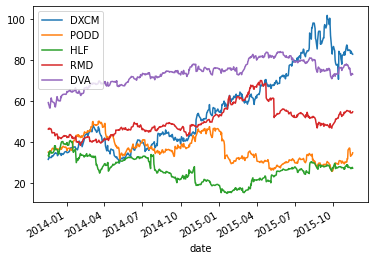

In [8]:
price.plot()

In [10]:
capital = 1000000
inception= '2013-11-18'
lookback_window = 30
rebalance_frequency = 50
components = price.columns

In [11]:
port = bt.Portfolio(capital, inception, components)
allo = bt.Allocator.EW()
timer = Timer(rebalance_frequency)
backtestor = bt.Backtestor.ByPeriod(lookback_window, timer, allo)

In [13]:
port = backtestor(port, price)

Backtesting portfolio: 100%|██████████████████████████████████████████████████████████| 504/504 [00:03<00:00, 136.16it/s]


In [17]:
port.summarize()

/Users/j/Documents/UCSB Drive.nosync/Projects/afterthought/afterthought/analyzer.py:107: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  sheet_all = pd.concat([sheet, sheet_ben], 1)


,portfolio
Begin,2013-11-18
End,2015-11-17
CAGR,0.1731
Annual Volatility,0.223099
Sharpe Ratio,0.82729
Total Return,0.376165
Max Drawdown,-0.154709


<AxesSubplot:>

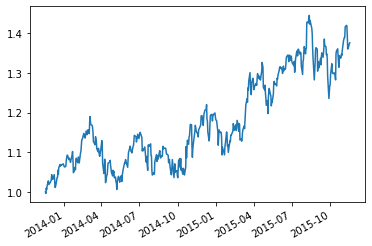

In [19]:
port.cum_returns.plot()